In [1]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin
from scipy.fftpack import fft, fftfreq
import os
from matplotlib import colors
import sdf

plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (10, 8)
import imageio as imageio
import glob

In [2]:
def getEr(lambd):
    m = 9.10938356e-31
    q = 1.60217662e-19
    c = 299792458
    w = 2 * 3.14159 * c / lambd
    return m * w * c / q

In [3]:
lambd = 1e-6
Er = getEr(1e-6)
omega0 = 2 * np.pi * 299792458 / 1e-6
tau = 2*pi/omega0
nc = omega0*omega0/(4*pi*pi*81)
dt = (20*tau/31570)
Er, omega0, nc, dt

(3210698360819.1753,
 1883651567308853.2,
 1.109574294736812e+27,
 2.1131713347998227e-18)

In [4]:
EXTENT = [-20, 20, -20, 20]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]
all_files.sort()
data = sdf.read(all_files[0])

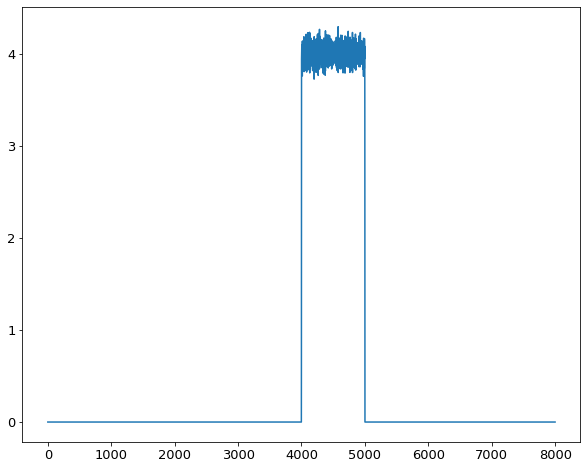

In [5]:
plt.plot(data.Derived_Number_Density_Electron.data/nc)

In [6]:
def plot_field(file, component="y", save=True, dir=".temp"):
    raw_data = sdf.read(file)
    image_name = file.split(".sdf")[0]
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    t = raw_data.Header["time"] * 1e15
    x = np.linspace(-4, 4, len(field))
    plt.plot(x, field)
    plt.axvline(0, color="red", lw=2)
    plt.axvline(1, color="red", lw=2)
    plt.xlabel("x [$\mu m$]")
    plt.ylabel("E [$\\frac{N}{C}$]")
    plt.title(f"E{component} at {t:.0f} fs")
    # print(image_name)
    if save:
        plt.savefig(dir + "/" + image_name + ".jpg")
        plt.close()
    else:
        plt.show()

In [7]:
plo

NameError: name 'plo' is not defined

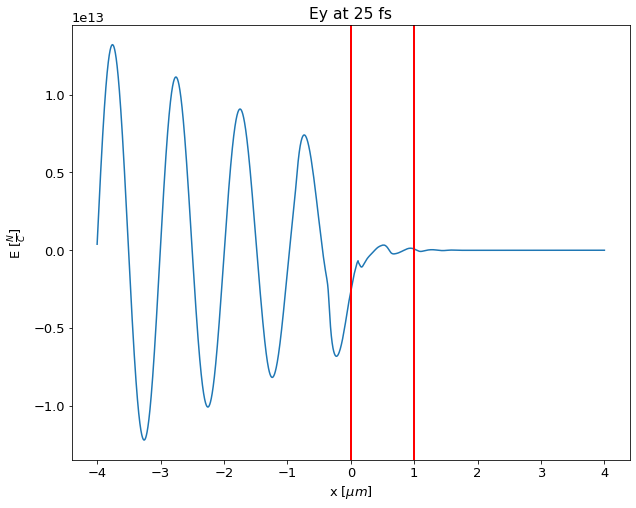

In [ ]:
plot_field(all_files[50], save=False)

In [ ]:
def make_video(dir=".temp", name="video.mp4", delete=False):
    images = []
    files = glob.glob(f"{dir}/*.jpg")
    files.sort()
    for file in files:
        images.append(imageio.imread(file))
    if name.endswith(".mp4"):
        imageio.mimsave(f"{dir}/{name}", images)
    else:
        imageio.mimsave(f"{dir}/{name}", images, duration=0.1)
    if delete:
        for file in files:
            os.remove(file)


In [ ]:
i=0
for file in all_files:
    print(i, end="\r")
    plot_field(file)
    i+=1

In [ ]:
make_video(delete=True)

In [ ]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field

In [ ]:
Et1 = []
Et2 = []
d = []
all_field = []
for i in range(len(all_files)):
    data = get_field(i, "y")
    all_field.append(data)
    Et1.append(data[300])
    Et2.append(data[3500])
    data = sdf.read(all_files[i])
    d.append(data.Derived_Number_Density_Electron.data)


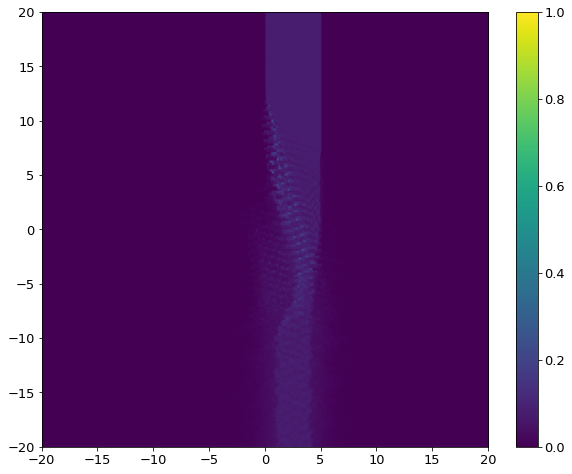

In [ ]:
plt.imshow(d / np.max(d), aspect="auto", extent=EXTENT)
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

In [ ]:
d = np.array(d)
d.shape

(202, 8000)

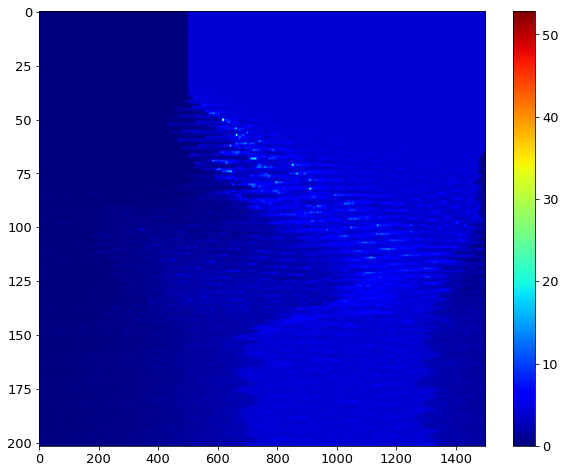

In [ ]:
plt.imshow(d[:, 3500:5000]/nc, aspect="auto", cmap="jet")
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

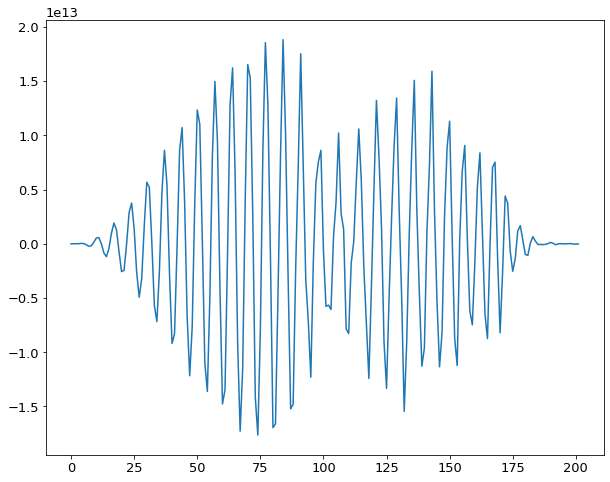

In [ ]:
plt.plot(Et1)


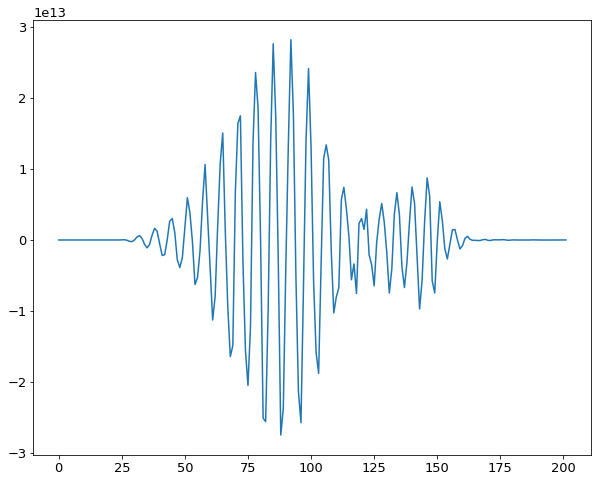

In [ ]:
plt.plot(Et2)


In [ ]:
Y = np.fft.fft(np.array(Et2))
Y = np.abs(Y)
# Y = np.fft.fftshift(Y)

In [ ]:
x = fftfreq(len(Et2), 0.5e-15)

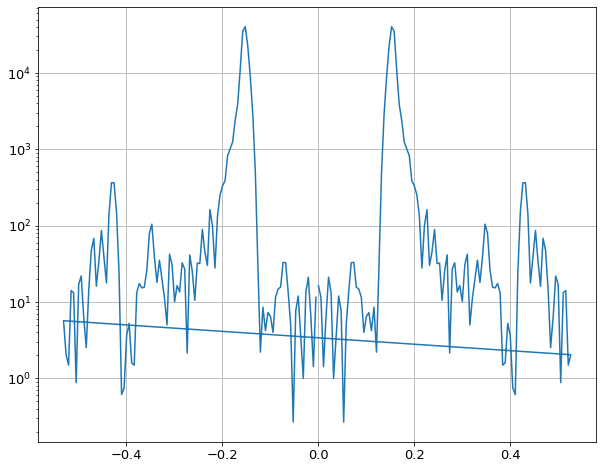

In [ ]:
plt.plot(x/omega0, (Y/Er)**2)
plt.yscale("log")
# plt.xlim(7,20)
plt.grid()

In [ ]:
def plot_at_node(node_num):
    E = []
    for i in range(len(all_files)):
        data = get_field(i, "y")    
        E.append(data[node_num])
    file_name = all_files[i].split(".sdf")[0]
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(15, 8)
    axes[0].plot(E)
    axes[1].plot(np.abs(fft(E))**2)
    axes[0].set_title(f"Field at node {node_num}")
    axes[1].set_title(f"FFT at node {node_num}")
    plt.savefig(f"images/node_{node_num}.jpg")
    plt.close()

In [ ]:
for i in range(1000, 3500, 50):
    print(i, end="\r")
    plot_at_node(i)